## Day 28 Lecture 1 Assignment

In this assignment, we will learn about making predictions with linear models. We will use the king county housing dataset loaded below and analyze the regression from this dataset.

In [1]:
%matplotlib inline

import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
king_county = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/kc_house_data.csv')

In [3]:
king_county.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
king_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


We'll start by adding a column of the log of total sqare feet. This transformation will help us with model assumptions.

In [5]:
# answer below:
king_county["log_sqft"]=np.log(king_county["sqft_living"])

In [6]:
king_county.sort_values('bedrooms', ascending=False).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_sqft
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,7.390181
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,...,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960,8.006368
15161,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,...,3010,600,1958,0,98006,47.5705,-122.175,2040,11914,8.191463
13314,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,...,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400,8.431635
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,...,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745,7.979339


Filter out columns and keeping only: price, bedrooms, bathrooms, log_sqft_living, floors, waterfront

In [7]:
# answer below:
king_county = king_county[["price","bedrooms","bathrooms","log_sqft","floors","waterfront"]].drop(index=15870)
X = king_county.drop(columns="price")
y = king_county[["price"]]

Next, we'll check for missing values and remove rows containing missing values. We will also make sure that all our data is numeric and convert the columns that are of object type to numeric. Make sure to remove any rows with missing data resulting from the conversion to numeric.

In [8]:
# answer below:
#sns.pairplot(king_county)
#plt.show()

Split the data into test and train subsets. Use 20% of the data for the test subset. Use price as the dependent variable.

In [9]:
# answer below:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13)

Check the model assumptions: homoscedacity, normal errors, and multicollinearity

In [10]:
#answer below:

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

lm = sm.OLS(y_train, X_train_const).fit()
lm.summary()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     2749.
Date:                Wed, 08 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:26:56   Log-Likelihood:            -2.4065e+05
No. Observations:               17289   AIC:                         4.813e+05
Df Residuals:                   17283   BIC:                         4.814e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.056e+06   5.28e+04    -57.826      0.000   -3.16e+06   -2.95e+06
bedrooms   -4.594e+04   2931.462    -15.671      0.000   -5.17e+04   -4.02e+04
bathrooms   6.574e+04   4459.101     14.742      0.000     5.7e+04    7.45e+04
log_sqft    4.778e+05   8213.585     58.169      0.000    4.62e+05    4.94e+05
floors     -2761.1276   4423.868     -0.624      0.533   -1.14e+04    5910.102
waterfront  9.147e+05   2.33e+04     39.181      0.000    8.69e+05     9.6e+05
==============================================================================
Omnibus:                    11863.583   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           403625.047
Skew:                           2.849   Prob(JB):                         0.00
Kurtosis:                      25.974   Cond. No.                         230.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
vifs = [] 

for i in range(X_train_const.shape[1]): 
    vif = variance_inflation_factor(X_train_const.values, i) 
    vifs.append(vif)
vifs_results = pd.DataFrame(vifs, index=X_train_const.columns, columns=['VIFS'])

In [12]:
display(vifs_results)

,VIFS
const,669.555832
bedrooms,1.711352
bathrooms,2.800878
log_sqft,2.911257
floors,1.357479
waterfront,1.012336


In [13]:
_, _, _, p1 = sms.het_breuschpagan(lm.resid, X_train_const)
p1

0.0

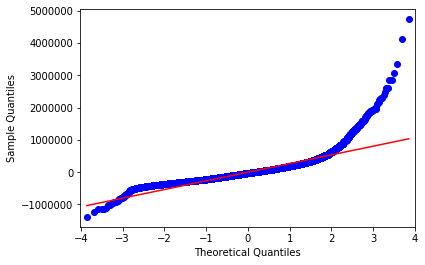

In [14]:
sm.qqplot(lm.resid,line="s")
plt.show()

There are two model assumptions that fail. One way to fix them is to apply a log transformation to price. Create a new train test split where y is the natural log of price and retest the model assumptions.

In [15]:
# answer below
y_new = np.log(y)

Create a linear model and produce a model summary

In [16]:
# answer below
X_train, X_test, y_train, y_test = train_test_split(X,y_new,test_size=0.2, random_state=13)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

lm = sm.OLS(y_train, X_train_const).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     3211.
Date:                Wed, 08 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:26:57   Log-Likelihood:                -7694.3
No. Observations:               17289   AIC:                         1.540e+04
Df Residuals:                   17283   BIC:                         1.545e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8769      0.074     92.527      0.000       6.731       7.023
bedrooms      -0.0704      0.004    -17.082      0.000      -0.079      -0.062
bathrooms      0.0495      0.006      7.897      0.000       0.037       0.062
log_sqft       0.8250      0.012     71.416      0.000       0.802       0.848
floors         0.0457      0.006      7.350      0.000       0.034       0.058
waterfront     0.7084      0.033     21.577      0.000       0.644       0.773
==============================================================================
Omnibus:                       86.704   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.314
Skew:                           0.110   Prob(JB):                     4.42e-17
Kurtosis:                       2.763   Cond. No.                         230.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

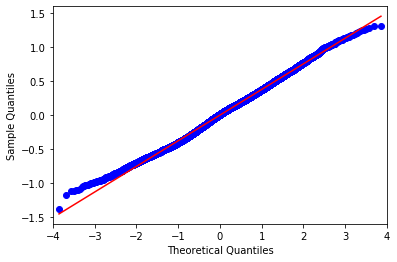

In [17]:
sm.qqplot(lm.resid,line="s")
plt.show()

Predict the y values for the test sample using our model above.

Plot the true vs. predicted values and compute the MAE, MSE, RMSE and MAPE

In [18]:
# answer below:
y_pred = lm.predict(X_test_const)

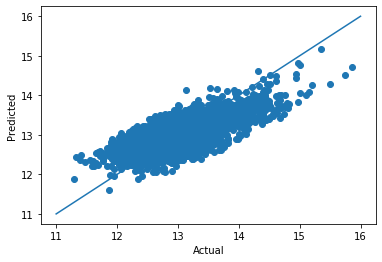

In [19]:
plt.scatter(y_test, y_pred)
plt.plot([11,16],[11,16])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [20]:
y_test = y_test["price"]

In [22]:
y_test = np.exp(y_test)

In [24]:
y_pred = np.exp(y_pred)

In [25]:
errors = y_test - y_pred
abs_errors = errors.abs()

mae = np.mean(abs_errors)
mape = (abs_errors / y_test).mean()

mse = (errors ** 2).mean()
rmse = np.sqrt(mse)

print(f"mae {mae:.2f}")
print(f"mse {mse:.2f}")
print(f"rmse {rmse:.2f}")
print(f"mape {mape * 100:.2f}%")

mae 167311.82
mse 80882688699.00
rmse 284398.82
mape 31.86%
